In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

Exercise 1: Create a function `simple_random_sample()` that will:
- take in a Pandas DataFrame and an integer $n$ as arguments, and
- return a simple random sample of size $n$ of the observations in a Pandas DataFrame.

In [2]:
def simple_random_sample(df, n):
    return df.sample(n)

Exercise 2: Create a function `stratified_random_sample()` that will:
- take in a Pandas DataFrame, a categorical column name corresponding to the variable on which you want to stratify, and an integer $n$ as arguments, and
- return a stratified random sample of size $n$ of the observations in a Pandas DataFrame. 

*Hint: Use your function from Exercise 1 to help out with that.*

In [3]:
from math import floor ## floor is a way for us to round everything down.

def stratified_random_sample(df, col, n):
    strata = list(set(df[col]))
    sample = df[df[col] == strata[0]].sample(int(floor(n * pd.DataFrame(df[col].value_counts()).loc[strata[0]][0] / df.shape[0])))
    for i in strata[1:]:
        sample = pd.concat([sample,df[df[col] == i].sample(int(floor(n * pd.DataFrame(df[col].value_counts()).loc[i][0] / df.shape[0])))])
### lines beneath this are to ensure that the final dataframe has n rows ###
    while sample.shape[0] < n:
        sample = pd.concat([sample, df.sample(n - sample.shape[0] , weights = df[col])])
        sample = sample.drop_duplicates()
    return sample

**Comments:** 
- First, there are many different ways of writing this function.
- Second, the function above the comment provides us with a true stratified random sample. 
    - If we're willing to compromise our stratified random sample in order to draw exactly $n$ observations, we can include the `while` loop beneath the comment to fill out the rest of our dataframe with values sampled proportionally to the variable on which we stratify.

Exercise 3: Create a function `cluster_random_sample()` that will:
- take in a Pandas DataFrame, a categorical column name corresponding to the variable of sampling units, and an integer $n$ as arguments, and
- return a **edit: cluster** random sample of size $n$ of the observations in a Pandas DataFrame. 

*Hint: Use your function from Exercise 2 to help out with that.*

In [4]:
def cluster_random_sample(df, col, n):
    strata = list(set(df[col]))
    sampling_unit = np.random.choice(strata)
    sample = df[df[col] == sampling_unit]
    strata.remove(sampling_unit)
    while sample.shape[0] < n:
        sampling_unit = np.random.choice(strata)
        sample = pd.concat([sample,df[df[col] == sampling_unit]])
        strata.remove(sampling_unit)
### lines beneath this are to ensure that the final dataframe has n rows ###
#    while sample.shape[0] > n:
#        sample = sample.drop(np.random.choice(sample[sample[col] == sampling_unit].index, sample.shape[0] - n, replace = False))
    return sample

**Comments:** 
- First, there are many different ways of writing this function.
- Second, the function above the comment provides us with a true cluster random sample. 
    - If we're willing to compromise our cluster random sample in order to draw exactly $n$ observations, we can include the `while` loop beneath the comment to drop out all observations beyond $n$ from the last cluster we included in our sample.

Exercise 4: Read in `train.csv`.

Gather a simple random sample of size 500 from `train`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a simple random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [5]:
train = pd.read_csv('./train.csv')

In [6]:
simple_mean = [np.mean(simple_random_sample(train,500)['Weekly_Sales']) for i in range(100)]

In [7]:
simple_mean[0:5]

[16244.232300000003,
 15085.56762,
 16125.659919999982,
 15098.50921999999,
 16992.069680000004]

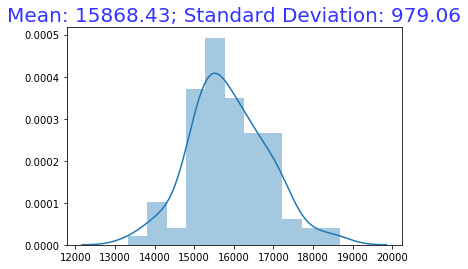

In [8]:
simple_mean_plot = sns.distplot(simple_mean)
simple_mean_plot.axes.set_title('Mean: ' + str(round(np.mean(simple_mean),2)) + "; Standard Deviation: " + str(round(np.std(simple_mean),2)),
                                fontsize = 20, 
                                color = "b", 
                                alpha = 0.8)

**You don't need to include the label as part of the graph, but this might be helpful code to copy and use in the future!**

Exercise 5: Gather a stratified random sample of size 500 from `train`, where you stratify on `Store`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a stratified random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [9]:
stratified_mean = []

# This function takes longer to run, so I want to print every 10 i values to ensure we're still making progress.

for i in range(100):
    stratified_mean.append(np.mean(stratified_random_sample(train,'Store',500)['Weekly_Sales']))
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


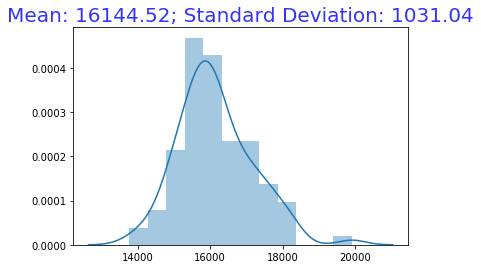

In [10]:
stratified_mean_plot = sns.distplot(stratified_mean)
stratified_mean_plot.axes.set_title('Mean: ' + str(round(np.mean(stratified_mean),2)) + "; Standard Deviation: " + str(round(np.std(stratified_mean),2)),
                                fontsize = 20, 
                                color = "b", 
                                alpha = 0.8)

Exercise 6: Gather a cluster random sample of size 500 from `train`, where your sampling unit is `Store`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a cluster random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [11]:
cluster_mean = []

# This function takes longer to run, so I want to print every 10 i values to ensure we're still making progress.

for i in range(100):
    cluster_mean.append(np.mean(cluster_random_sample(train,'Store',500)['Weekly_Sales']))
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


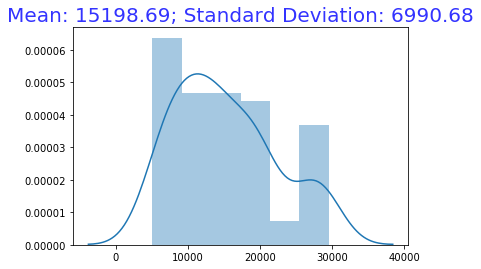

In [12]:
cluster_mean_plot = sns.distplot(cluster_mean)
cluster_mean_plot.axes.set_title('Mean: ' + str(round(np.mean(cluster_mean),2)) + "; Standard Deviation: " + str(round(np.std(cluster_mean),2)),
                                fontsize = 20, 
                                color = "b", 
                                alpha = 0.8)

Exercise 7: What do you notice about the means of these distributions? What do you notice about the standard deviations of these distributions? What does this suggest to you about these sampling methods?

In [14]:
np.mean(train['Weekly_Sales'])

15981.258123467243

**Answer 7:** 

*MEAN*
- The true mean of Weekly Sales is 15,981.26.
- The mean of the simple random sample means is 15,868.43.
- The mean of the stratified random sample means is 16,144.52.
- The mean of the cluster random sample means is 15,198.69.
- **Conclusion:** While the simple random sample means and stratified random sample means were within about 150 of the true population mean, the cluster random sample mean was about 800 away. **This suggests that cluster random sampling performs worse than simple and stratified random sampling.**

*STANDARD ERROR*
- The standard deviation of the simple random sample means (also called **standard error**) is 979.06.
- The standard deviation of the stratified random sample means (also called **standard error**) is 1,031.04.
- The standard deviation of the cluster random sample means (also called **standard error**) is 6,990.68.
- **Conclusion:** The standard errors for the simple and stratified random sample means are close, but the simple random sample means here have a slightly smaller standard error. This is good! The standard error for the cluster random sample means is substantially worse than the simple or stratified random samples. **This also suggests that cluster random sampling performs worse than simple and stratified random sampling.**

*ADDITIONAL CONCLUSION*
- **Conclusion:** Given that the simple random sample performs slightly better than the stratified random sample, it suggests that the variable `Store` is probably not a very good variable on which we should stratify. In this case, stratifying our data is more complex, more time-consuming, and yields a worse result. I would use simple random sampling in this case.